In [1]:
import random 
import time
import matplotlib.pyplot as plt

In [2]:
def knapSackProblem(cap, peso, valores):
    n = len(valores)
    matriz = [[0 for x in range(cap + 1)] for x in range(n + 1)]
    for c in range(cap + 1):
        for i in range(n + 1):
            if(i == 0 or c == 0):
                matriz[i][c] = 0
            elif (peso[i-1] <= c):
                matriz[i][c] = max(valores[i-1] + matriz[i-1][c-peso[i-1]],
                            matriz[i-1][c])
            else:
                matriz[i][c] = matriz[i-1][c]
    return (matriz[n][cap], matriz)

In [62]:
random.seed(9)

In [63]:
times = {}
results = {}
for n in range(100, 501, 100):
    t = []
    for i in range(0,50):
        start_time = time.time()
        valores = [random.randint(1,n) for i in range(1,n+1)]
        pesos = [random.randint(1,n) for i in range(1,n+1)]
        cap = int(sum(pesos)/2)
        valor_maximo, matriz = knapSackProblem(cap, pesos, valores)
        t.append(time.time() - start_time)
    times[n] = t
    results[n] = sum(t)/len(t)
#print(matriz)

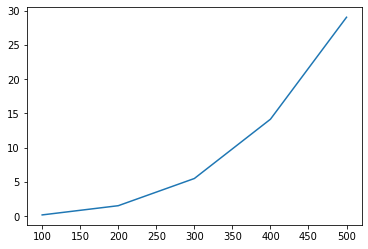

In [64]:
# Print das médias
plt.plot(results.keys(), results.values())

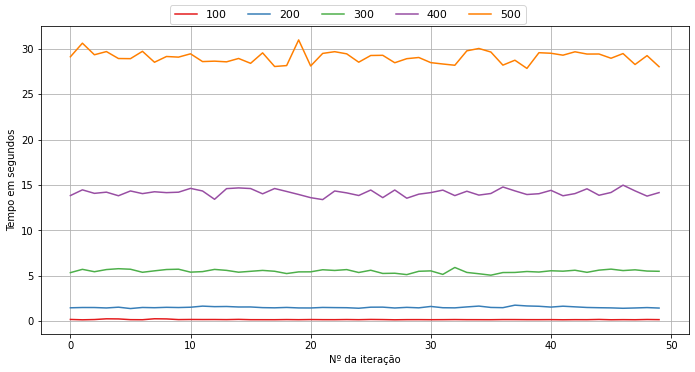

In [115]:
palette = plt.get_cmap('Set1')

fig, axs = plt.subplots(1,figsize=(10,5))
fig.tight_layout(h_pad=1.6, w_pad=1.6)

multi_width = 0.97
multi_height = 0.97

ax = 0

num = 0
for value in times:
    axs.plot(times[value], color=palette(num), linewidth=1.5, alpha=1, label=f"{value}")
    num += 1
    fig.legend()
box = axs.get_position()
axs.set_position([box.x0, box.y0,  box.width*multi_width, box.height*multi_height])

axs.set(xlabel="Nº da iteração", ylabel="Tempo em segundos")
axs.grid()

fig.legends = []
fig.legend(ncol=5, prop={'size':11}, loc="upper center");

### Pseudocódigo e Análise Assintótica

In [ ]:
Função KnaspackProblem(cap, valores, Peso):
    n <- tamanho(valores)----------------------------------- c1 
    matriz <- criarMatriz[n][cap] -------------------------- c2 
    Para cada c em range(cap+1): --------------------------- cap+1
        Para cada i em range(n+1): ------------------------- n+1
            Se (i = 0 ou c = o): --------------------------- (n)*(cap+1)
                matriz[i][c] <- 0 -------------------------- c3
            Senão se(Peso[i-1] <= c): ---------------------- (n)*(cap+1)
                matriz[i][c] <- maximo(valores[i-1]+matriz[i-1][c-Peso[i-1]], matriz[i-1][c]) ---- c4
            Senão: ----------------------------------------- c5
                matriz[i][c] <- matriz[i-1][c] ------------- c6
                
    retorna (matriz[n][cap], matriz) ----------------------- c7


R: c1 + c2 + (cap+1) + (n+1) + (n*(cap+1)) + (c3) + (n*(cap+1)) + c4 + c5 + c6 c7
R: 2*n*(cap+1) => O(n*cap)

# Testes casos específicos

In [25]:
def knapSackProblem(cap, peso, valores):
    n = len(valores)
    matriz = [[0 for x in range(cap + 1)] for x in range(n + 1)]
    for c in range(cap + 1):
        for i in range(n + 1):
            if(i == 0 or c == 0):
                matriz[i][c] = 0
            elif (peso[i-1] <= c):
                matriz[i][c] = max(valores[i-1] + matriz[i-1][c-peso[i-1]],
                            matriz[i-1][c])
            else:
                matriz[i][c] = matriz[i-1][c]
    return (matriz[n][cap], matriz)

### Pior caso

In [52]:
start_time = time.time()
v = [60,100,120]
w = [10,20,30]
c = 10000000
valor, matriz = knapSackProblem(c, w, v)
print(f"Tempo {time.time()-start_time}")

Tempo 26.330949544906616


### Melhor caso

In [36]:
start_time = time.time()
v = [60, 100, 120]
w = [10,20,30]
c = 50
valor, matriz = knapSackProblem(c, w, v)
print(f"Tempo {time.time()-start_time}")

Tempo 0.0006465911865234375


In [50]:
start_time = time.time()
v = [60,100,120,140,160,180,200,220,240,260,280,300,320,340,360]
w = [10,20,30,40,50,60,70,80,90,100,120,140,160,180,200]
c = 2**len(v)
valor, matriz = knapSackProblem(c, w, v)
print(f"Tempo {time.time()-start_time}")

Tempo 0.3921184539794922
